# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 25 Machine Learning (II)

## 25.1 Artificial Neural Networks

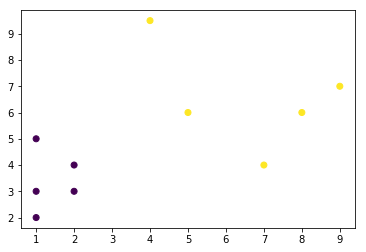

In [27]:
import matplotlib.pyplot as plt

x = np.array([[1,1,2],[1,1,3],[1,1,5],[1,2,3],[1,2,4],[1,7,4],[1,5,6],[1,8,6],[1,9,7],[1,4,9.5]])
t = np.array([0,0,0,0,0,1,1,1,1,1])
plt.scatter(x[:,1],x[:,2], c=t)
plt.show()


In [50]:
import numpy as np

def sigmoid(v):
    return 1./(1+np.exp(-v))


def singleNeuron(x, t, max_iter = 8000):
    
    w0 = np.array([1,1,1])
    w_hist = np.zeros([max_iter,3])
    learning_rate = 0.01
    decay_rate = 0.0

    for i in range(max_iter):
        a = np.dot(x,w0)
        y = sigmoid(a)
        g = -np.dot(np.transpose(x),t-y)
        w0 = w0 - learning_rate*(g + decay_rate*w0)
        w_hist[i,:] = w0
    return w_hist

def results(x, w0):
    for x0 in x:
        print(sigmoid(w0[0] + w0[1]*x0[1]+w0[2]*x0[2]))

In [51]:
w_hist = singleNeuron(x, t)

In [52]:
results(x, w_hist[0])

0.971860800012
0.987540896252
0.99761031473
0.995048449601
0.997836383208
0.999979301526
0.999974738805
0.999998449899
0.99999973359
0.999996502303


In [53]:
results(x, w_hist[-1])

0.00105729613699
0.00174218596535
0.00472266736881
0.0187549150045
0.0305532416454
0.999798650689
0.991194045052
0.99999323672
0.999999625477
0.983379665113


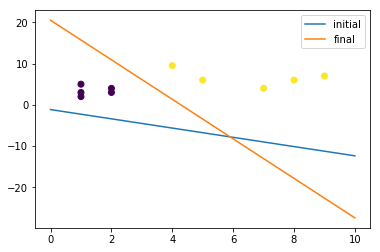

In [54]:
import matplotlib.pyplot as plt

def plane(x,w):
    return (-w[0] - x*w[1])/w[2]
plt.scatter(x[:,1],x[:,2], c=t)

x0 = np.linspace(0,10,20)
y0 = plane(x0, w_hist[0])
plt.plot(x0, y0, label='initial')
y0 = plane(x0, w_hist[-1])
plt.plot(x0, y0, label='final')
plt.legend()
plt.show()


In [ ]:
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

fig = plt.figure()
ax = plt.axes(xlim=(0,10), ylim=(-25,20), xlabel='x1', ylabel='x2')
ax.scatter(x[:,1], x[:,2], c=t)
w0 = np.array([1,1,1])
points, = ax.plot([], [])

def evolve(i):
    x0 = np.linspace(0,10,20)
    w = w_hist[i]
    y0 = plane(x0, w)
    points.set_data(x0,y0)
    return points

anim = animation.FuncAnimation(fig, evolve, frames = len(w_hist), interval = 10)
display_animation(anim, default_mode = 'once')
    